In [1]:
import sys
import numpy as np
sys.path.insert(0, r"C:\Users\User\Documents\Projects\Markup-Tool\result-inference-service")
from core.infer_multi_recognition import infer_multi_recognition
from pathlib import Path

In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
def rect_dict_to_arr(rect):
    return rect["x1"], rect["y1"], rect["x2"], rect["y2"]

In [4]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

with open(r"C:\Users\User\Documents\data\faces.json", "r") as f:
    results = json.load(f)

In [5]:
results

{'markupId': '0e12d3ed-d456-4019-8782-6651be0e92af',
 'type': 'multi-recognition',
 'items': [{'id': '2194b605-47de-4e63-bba9-e654064c63f5',
   'result': {'status': 'CANNOT_DETECT_OBJECT'},
   'datasetItemId': 'd03cdfc4-4e90-4db3-a527-33d1edc6dcd3',
   'imageUrl': '8092d90175b56afa194b/80924296686141517f44d7cb81ee3422'},
  {'id': '49359bfe-9cdd-4663-96cb-2e68b5b1022a',
   'result': {'status': 'CANNOT_DETECT_OBJECT'},
   'datasetItemId': 'f858cff4-b0a9-467e-a3cb-f459d73cd620',
   'imageUrl': '8092d90175b56afa194b/8ff4f3f5826910f9f3bd5755f59d89d7'},
  {'id': '0f380f3c-c85d-44be-a40d-5114f4f7621a',
   'result': {'status': 'CANNOT_DETECT_OBJECT'},
   'datasetItemId': 'f858cff4-b0a9-467e-a3cb-f459d73cd620',
   'imageUrl': '8092d90175b56afa194b/8ff4f3f5826910f9f3bd5755f59d89d7'},
  {'id': 'a3764da8-5e80-4fb9-8772-d8074dc7a3f3',
   'result': {'status': 'SUCCESS',
    'rectangles': [{'x1': 23.2, 'y1': 166.8, 'x2': 54.4, 'y2': 197.2},
     {'x1': 75.2, 'y1': 191.2, 'x2': 111.2, 'y2': 223.2},
  

In [13]:
items = results["items"]
items = list(filter(lambda x: x["result"]["status"] == "SUCCESS", items))
items = [{**item, "imageUrl": str(Path(IMAGE_DIR, item["imageUrl"])) } for item in items]

In [14]:
inferred = infer_multi_recognition(items, aggregate="mean")

[[0.         1.         1.         1.         1.         0.23897618
  1.         1.         1.         1.         1.        ]
 [1.         0.         1.         1.         1.         1.
  0.54205607 1.         1.         1.         1.        ]
 [1.         1.         0.         1.         1.         1.
  1.         0.41269841 1.         1.         1.        ]
 [1.         1.         1.         0.         1.         1.
  1.         1.         0.46853431 1.         1.        ]
 [1.         1.         1.         1.         0.         1.
  1.         1.         1.         0.26102088 1.        ]
 [0.23897618 1.         1.         1.         1.         0.
  1.         1.         1.         1.         1.        ]
 [1.         0.54205607 1.         1.         1.         1.
  0.         1.         1.         1.         1.        ]
 [1.         1.         0.41269841 1.         1.         1.
  1.         0.         1.         1.         1.        ]
 [1.         1.         1.         0.46853431 1.

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass min_samples=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass min_samples=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an 

In [15]:
from pathlib import Path
from PIL import Image

IMAGE_DIR = r"C:\Users\User\Documents\Projects\Markup-Tool\images"
paths = [item["imageUrl"] for item in items]
paths = list(set(paths))

images = { path: Image.open(path) for path in paths }

In [16]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [36]:
import matplotlib.patches as patches

def plot_markup(ax, img, markup):
    get_color = get_cmap(len(markup)+1)

    ax.imshow(img, cmap="gray")

    for i, rects in enumerate(markup):
        c = get_color(i)
        for r in rects:
            print(r)
            w = r["x2"] - r["x1"]
            h = r["y2"] - r["y1"]
            rect = patches.Rectangle((r["x1"], r["y1"]), w, h, linewidth=200/img.size[1], edgecolor=c, facecolor="none")
            ax.add_patch(rect)

{'x1': 23.2, 'y1': 166.8, 'x2': 54.4, 'y2': 197.2}
{'x1': 75.2, 'y1': 191.2, 'x2': 111.2, 'y2': 223.2}
{'x1': 144, 'y1': 202.4, 'x2': 172.8, 'y2': 233.6}
{'x1': 161.6, 'y1': 147.6, 'x2': 193.2, 'y2': 177.6}
{'x1': 220, 'y1': 161.2, 'x2': 251.6, 'y2': 193.2}
{'x1': 281.2, 'y1': 209.6, 'x2': 314.8, 'y2': 243.2}
{'x1': 340, 'y1': 163.2, 'x2': 373.6, 'y2': 198.8}
{'x1': 412.4, 'y1': 195.6, 'x2': 446, 'y2': 229.6}
{'x1': 92, 'y1': 74.8, 'x2': 112, 'y2': 100}
{'x1': 138.4, 'y1': 107.2, 'x2': 163.2, 'y2': 132}
{'x1': 201.2, 'y1': 88, 'x2': 221.6, 'y2': 108}
{'x1': 262.8, 'y1': 94.4, 'x2': 286.8, 'y2': 116}
{'x1': 311.2, 'y1': 107.2, 'x2': 336.4, 'y2': 132.4}
{'x1': 390.4, 'y1': 111.2, 'x2': 414.4, 'y2': 134.8}
{'x1': 427.2, 'y1': 135.6, 'x2': 454.8, 'y2': 159.6}
{'x1': 240.5, 'y1': 45, 'x2': 297.5, 'y2': 99}
{'x1': 390.5, 'y1': 96, 'x2': 458.5, 'y2': 157}
{'x1': 549.5, 'y1': 30, 'x2': 618.5, 'y2': 98}
{'x1': 90, 'y1': 64.4, 'x2': 112.8, 'y2': 90.4}
{'x1': 266.8, 'y1': 146.4, 'x2': 290, 'y2': 

<ipython-input-37-fb538a1fd917>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



{'x1': 512.5, 'y1': 83.0, 'x2': 561.5, 'y2': 149.0}
{'x1': 549.5, 'y1': 260.0, 'x2': 661.5, 'y2': 373.0}
{'x1': 737.5, 'y1': 188.0, 'x2': 830.5, 'y2': 277.0}
{'x1': 557.5, 'y1': 284.0, 'x2': 616.5, 'y2': 351.0}
{'x1': 504.5, 'y1': 106.0, 'x2': 568.5, 'y2': 157.0}
{'x1': 228.58333333333331, 'y1': 235.5, 'x2': 280.41666666666663, 'y2': 285.16666666666663}
{'x1': 367.41666666666663, 'y1': 236.83333333333331, 'x2': 410.91666666666663, 'y2': 283.33333333333337}
{'x1': 393.41666666666663, 'y1': 53.5, 'x2': 435.91666666666663, 'y2': 98.5}
{'x1': 479.58333333333337, 'y1': 116.33333333333334, 'x2': 527.9166666666667, 'y2': 172.5}
{'x1': 552.9166666666667, 'y1': 77.66666666666666, 'x2': 596.75, 'y2': 128.16666666666666}
{'x1': 654.5833333333333, 'y1': 105.16666666666666, 'x2': 706.4166666666667, 'y2': 158.66666666666669}
{'x1': 625.75, 'y1': 173.0, 'x2': 665.0833333333333, 'y2': 218.5}
{'x1': 725.75, 'y1': 215.33333333333331, 'x2': 766.9166666666667, 'y2': 271.33333333333337}
{'x1': 594.9166666

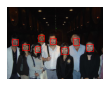

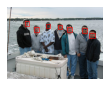

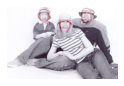

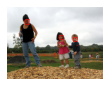

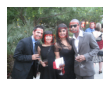

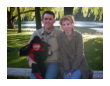

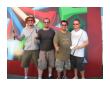

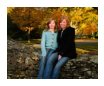

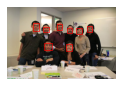

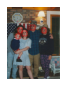

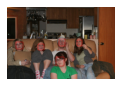

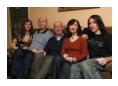

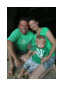

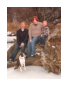

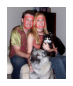

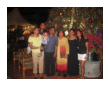

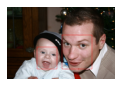

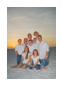

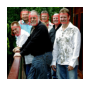

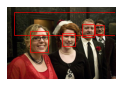

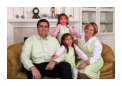

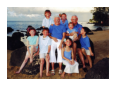

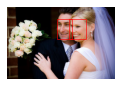

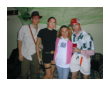

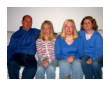

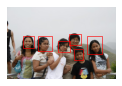

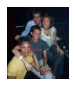

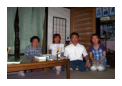

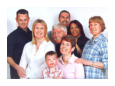

In [37]:
for i, item in enumerate(inferred):
    image = images[item["imageUrl"]]
    markup = item["result"]["rectangles"]
    
    width, height = image.size
    fig = plt.figure()
    fig.set_size_inches(width/height, 1)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
 
    plot_markup(ax, image, [markup])
    
    plt.savefig(r"C:\Users\User\Documents\study\диплом\inference\processed_mean\\" + item["imageUrl"].split("\\")[-1], dpi=height)

{'x1': 230, 'y1': 58, 'x2': 302, 'y2': 147}
{'x1': 285, 'y1': 58, 'x2': 363, 'y2': 149}
{'x1': 203.5, 'y1': 234, 'x2': 254.5, 'y2': 285}
{'x1': 371.5, 'y1': 173, 'x2': 421.5, 'y2': 224}
{'x1': 514.5, 'y1': 219, 'x2': 558.5, 'y2': 264}
{'x1': 73, 'y1': 135.5, 'x2': 124, 'y2': 188.5}
{'x1': 140, 'y1': 133.5, 'x2': 207, 'y2': 204.5}
{'x1': 235, 'y1': 156.5, 'x2': 288, 'y2': 206.5}
{'x1': 287, 'y1': 124.5, 'x2': 341, 'y2': 177.5}
{'x1': 310, 'y1': 194.5, 'x2': 352, 'y2': 245.5}
{'x1': 367, 'y1': 134.5, 'x2': 438, 'y2': 215.5}
{'x1': 280.5, 'y1': 380, 'x2': 473.5, 'y2': 592}
{'x1': 516.5, 'y1': 270, 'x2': 801.5, 'y2': 589}
{'x1': 386.5, 'y1': 345, 'x2': 472.5, 'y2': 455}
{'x1': 196.5, 'y1': 532, 'x2': 337.5, 'y2': 660}
{'x1': 375.5, 'y1': 120, 'x2': 471.5, 'y2': 223}
{'x1': 500.5, 'y1': 175, 'x2': 599.5, 'y2': 291}
{'x1': 228.5, 'y1': 233, 'x2': 283.5, 'y2': 289}
{'x1': 365.5, 'y1': 235, 'x2': 410.5, 'y2': 280}
{'x1': 393.5, 'y1': 53, 'x2': 440.5, 'y2': 103}
{'x1': 484.5, 'y1': 114, 'x2': 5

<ipython-input-38-85a307ed5597>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


{'x1': 182, 'y1': 240, 'x2': 293, 'y2': 358}
{'x1': 319, 'y1': 223, 'x2': 415, 'y2': 315}
{'x1': 424, 'y1': 489, 'x2': 516, 'y2': 579}
{'x1': 294.5, 'y1': 238, 'x2': 341.5, 'y2': 283}
{'x1': 359.5, 'y1': 188, 'x2': 403.5, 'y2': 231}
{'x1': 395.5, 'y1': 270, 'x2': 434.5, 'y2': 308}
{'x1': 458.5, 'y1': 236, 'x2': 507.5, 'y2': 286}
{'x1': 557.5, 'y1': 269, 'x2': 596.5, 'y2': 311}
{'x1': 670.5, 'y1': 257, 'x2': 715.5, 'y2': 299}
{'x1': 742.5, 'y1': 265, 'x2': 784.5, 'y2': 311}
{'x1': 27, 'y1': 117.5, 'x2': 118, 'y2': 186.5}
{'x1': 95, 'y1': 27.5, 'x2': 152, 'y2': 95.5}
{'x1': 146, 'y1': 48.5, 'x2': 202, 'y2': 116.5}
{'x1': 224, 'y1': 42.5, 'x2': 267, 'y2': 90.5}
{'x1': 302, 'y1': 59.5, 'x2': 345, 'y2': 106.5}
{'x1': 344, 'y1': 49.5, 'x2': 402, 'y2': 112.5}
{'x1': 207, 'y1': 221.5, 'x2': 500, 'y2': 377.5}
{'x1': 29, 'y1': 131.5, 'x2': 82, 'y2': 188.5}
{'x1': 89, 'y1': 38.5, 'x2': 154, 'y2': 126.5}
{'x1': 139, 'y1': 57.5, 'x2': 200, 'y2': 115.5}
{'x1': 223, 'y1': 23.5, 'x2': 276, 'y2': 103.5

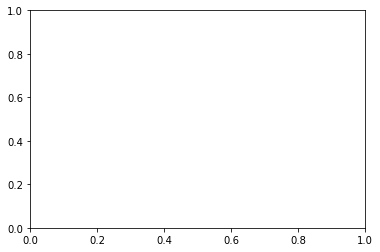

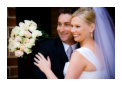

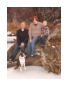

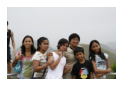

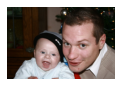

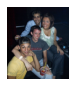

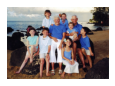

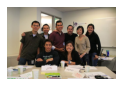

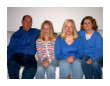

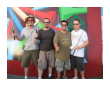

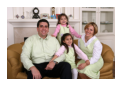

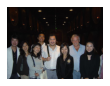

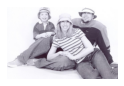

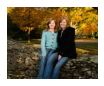

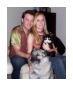

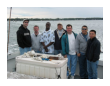

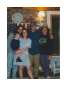

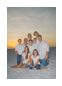

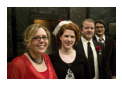

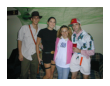

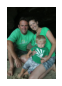

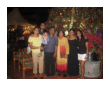

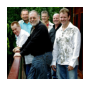

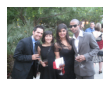

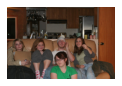

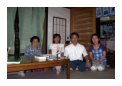

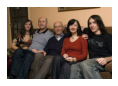

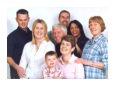

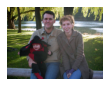

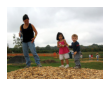

In [38]:
fig, ax = plt.subplots()
for i, (path, image) in enumerate(images.items()):
    its = list(filter(lambda x: x["imageUrl"] == path, items))
    its = [it["result"]["rectangles"] for it in its]
    
    width, height = image.size
    fig = plt.figure()
    fig.set_size_inches(width/height, 1)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    plot_markup(ax, image, its)
    
    plt.savefig(r"C:\Users\User\Documents\study\диплом\inference\raw\\" + path.split("\\")[-1], dpi=height)
    
    [p.remove() for p in reversed(ax.patches)]

In [11]:
fig, axs = plt.subplots(len(images), figsize=(5, 50))
for i, (img_name, markup) in enumerate(image_results.items()):
    rects = []
    for r in markup:
        rects += r
    rects = np.array(rects)
    
    clusters = dbscan_markup(rects)
    
    new_rects = []
    for j in range(ax(clusters)+1):
        mask = clusters == j
        new_rects.append(np.mean(rects[mask], axis=0))

    groups = list(map(lambda x: [x], rects))
    plot_markup(axs[i], images[img_name], groups)

NameError: name 'images' is not defined

In [12]:
fig, axs = plt.subplots(len(images), figsize=(5, 50))
for i, (img_name, markup) in enumerate(image_results.items()):
    rects = []
    for r in markup:
        rects += r
    
    inferred_rects = infer_multi_recognition(rects)

    groups = np.array(list(map(lambda r: [r], inferred_rects)))
        
    plot_markup(axs[i], images[img_name], groups)

NameError: name 'images' is not defined

In [190]:
def infer_multi_recognition(markup):
    rects = []
    for _rects in markup:
        for r in _rects:
            rects.append([r["x1"], r["y1"], r["x2"], r["y2"]])

    clusters = dbscan_markup(rects)
    filtered_rects = []
    for j in range(max(clusters) + 1):
        mask = clusters == j
        filtered_rects.append(np.mean(rects[mask], axis=0))
        
    return list(map(lambda r: [{"x1":r[0], "y1": r[1], "x2":r[2], "y2": r[3]}], filtered_rects))